<a href="https://colab.research.google.com/github/jjuliafarias/TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_json('/content/TelecomX_Data.json')


In [ ]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
colunas = list(dados.columns)
colunas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [ ]:
customer_df = pd.json_normalize(dados['customer']).add_prefix('customer_')
phone_df = pd.json_normalize(dados['phone']).add_prefix('phone_')
internet_df = pd.json_normalize(dados['internet']).add_prefix('internet_')
account_df = pd.json_normalize(dados['account']).add_prefix('account_')

In [ ]:
# Remover as colunas originais que têm os dicionários
dados = dados.drop(columns=['customer', 'phone', 'internet', 'account'])

# Concatenar as colunas expandidas ao DataFrame original
dados = pd.concat([dados, customer_df, phone_df, internet_df, account_df], axis=1)



In [ ]:
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
dados = dados.replace({'Yes': 1, 'No': 0})
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias,Contas_Diarias_formatada
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.3,2.19,"2,19"
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00,"2,00"
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,"2,46"
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,"3,27"
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.80,"2,80"


In [ ]:
# Quantas linhas duplicadas existem?
num_duplicatas = dados.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {num_duplicatas}")

# Mostrar as linhas duplicadas (se quiser inspecionar)
print(dados[dados.duplicated()])


Quantidade de linhas duplicadas: 0
Empty DataFrame
Columns: [customerID, Churn, customer_gender, customer_SeniorCitizen, customer_Partner, customer_Dependents, customer_tenure, phone_PhoneService, phone_MultipleLines, internet_InternetService, internet_OnlineSecurity, internet_OnlineBackup, internet_DeviceProtection, internet_TechSupport, internet_StreamingTV, internet_StreamingMovies, account_Contract, account_PaperlessBilling, account_PaymentMethod, account_Charges.Monthly, account_Charges.Total]
Index: []

[0 rows x 21 columns]


In [ ]:
# Quantidade de valores nulos por coluna
print(dados.isnull().sum())

# Ver se existe algum valor nulo no DataFrame
tem_nulo = dados.isnull().values.any()
print(f"Tem valor nulo? {tem_nulo}")

# Mostrar linhas que têm pelo menos um valor nulo (para você analisar)
print(dados[dados.isnull().any(axis=1)])


customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64
Tem valor nulo? False
Empty DataFrame
Columns: [customerID, Churn, customer_gender, customer_SeniorCitizen, customer_Partner, customer_Dependents, customer_tenure, phone_PhoneService, phone_MultipleLines, internet_InternetService, internet_OnlineSecurity, internet_OnlineBackup, internet_DeviceProtection, internet_TechSupport, internet

In [ ]:
# Lista com todas as colunas
colunas = dados.columns.tolist()

# Colunas duplicadas (repetidas)
colunas_duplicadas = [col for col in set(colunas) if colunas.count(col) > 1]

print("Colunas duplicadas:", colunas_duplicadas)


Colunas duplicadas: []


In [ ]:
# 1. Criar coluna Contas_Diarias
dados['Contas_Diarias'] = dados['account_Charges.Monthly'] / 30

# 2. Arredondar para 2 casas decimais
dados['Contas_Diarias'] = dados['Contas_Diarias'].round(2)

# 3. Criar coluna formatada para exibição com vírgula decimal
dados['Contas_Diarias_formatada'] = dados['Contas_Diarias'].apply(lambda x: f"{x:,.2f}".replace('.', ','))

# 4. Exemplo de exportação para CSV com vírgula decimal (se quiser salvar)
dados.to_csv('dados_formatados.csv', decimal=',', index=False)

# 5. Mostrar resultado formatado
print(dados[['account_Charges.Monthly', 'Contas_Diarias', 'Contas_Diarias_formatada']].head())


   account_Charges.Monthly  Contas_Diarias Contas_Diarias_formatada
0                     65.6            2.19                     2,19
1                     59.9            2.00                     2,00
2                     73.9            2.46                     2,46
3                     98.0            3.27                     3,27
4                     83.9            2.80                     2,80


In [ ]:
dados

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias,Contas_Diarias_formatada
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.60,593.3,2.19,"2,19"
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.90,542.4,2.00,"2,00"
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46,"2,46"
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27,"3,27"
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.90,267.4,2.80,"2,80"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,1,0,0,One year,0,Mailed check,55.15,742.9,1.84,"1,84"
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,2.84,"2,84"
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68,"1,68"
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26,"2,26"


In [ ]:
#Análise descritiva

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   int64  
 5   customer_Dependents        7267 non-null   int64  
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   int64  
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
# 1. Substituir string vazia por NaN
dados['Churn'] = dados['Churn'].replace('', None)

# 2. Converter a coluna para tipo numérico (float com NaN)
dados['Churn'] = pd.to_numeric(dados['Churn'], errors='coerce')

# 3. Calcular a média ignorando os valores ausentes
media_churn = dados['Churn'].mean()

# 4. Mostrar como porcentagem
print(f"Média de churn: {media_churn:.2%}")



Média de churn: 26.54%


In [ ]:
mediana_churn = dados['Churn'].median()
desvio_churn = dados['Churn'].std()

print(f"Mediana de churn: {mediana_churn:.2%}")
print(f"Desvio padrão de churn: {desvio_churn:.2%}")


Mediana de churn: 0.00%
Desvio padrão de churn: 44.16%


In [ ]:
# 2. Agrupar por gênero e calcular a média de churn
media_churn_por_genero = dados.groupby('customer_gender')['Churn'].mean()

# 3. Exibir com porcentagem formatada
print(media_churn_por_genero.apply(lambda x: f"{x:.2%}"))


customer_gender
Female    26.92%
Male      26.16%
Name: Churn, dtype: object


In [ ]:
estatisticas_genero = dados.groupby('customer_gender')['Churn'].agg(['median', 'std'])

# Formatando para percentual
estatisticas_genero = estatisticas_genero.applymap(lambda x: f"{x:.2%}")

print(estatisticas_genero)


                median     std
customer_gender               
Female           0.00%  44.36%
Male             0.00%  43.96%


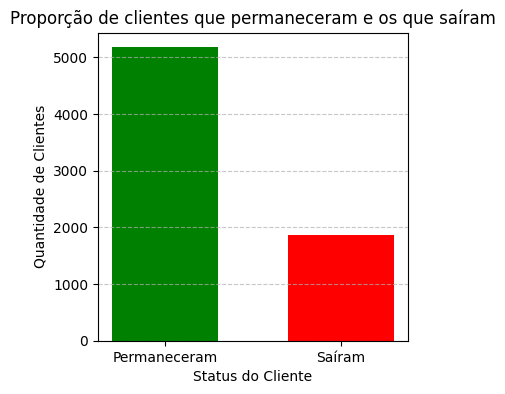

In [ ]:
import matplotlib.pyplot as plt

contagem_churn = dados['Churn'].value_counts().sort_index()

labels = ['Permaneceram', 'Saíram']
valores = [contagem_churn.get(0, 0), contagem_churn.get(1, 0)]

plt.figure(figsize=(4,4
                    ))
plt.bar(labels, valores, color=['green', 'red'], width=0.6)
plt.title('Proporção de clientes que permaneceram e os que saíram')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('Status do Cliente')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [ ]:
categorias = ['customer_gender', 'account_Contract', 'account_PaymentMethod']

for cat in categorias:
    print(f"\nChurn médio por {cat}:")
    media_churn_cat = dados.groupby(cat)['Churn'].mean().apply(lambda x: f"{x:.2%}")
    print(media_churn_cat)



Churn médio por customer_gender:
customer_gender
Female    26.92%
Male      26.16%
Name: Churn, dtype: object

Churn médio por account_Contract:
account_Contract
Month-to-month    42.71%
One year          11.27%
Two year           2.83%
Name: Churn, dtype: object

Churn médio por account_PaymentMethod:
account_PaymentMethod
Bank transfer (automatic)    16.71%
Credit card (automatic)      15.24%
Electronic check             45.29%
Mailed check                 19.11%
Name: Churn, dtype: object


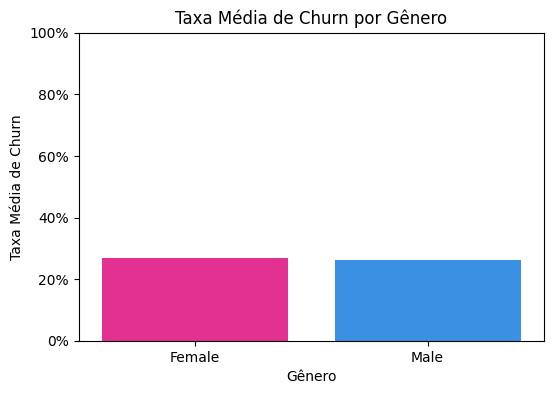

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {'Female': '#FF1493', 'Male': '#1E90FF'}  # rosa forte e azul forte

plt.figure(figsize=(6,4))
sns.barplot(x='customer_gender', y='Churn', data=dados, ci=None, palette=palette)

plt.title('Taxa Média de Churn por Gênero')
plt.ylabel('Taxa Média de Churn')
plt.xlabel('Gênero')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.ylim(0, 1)

plt.show()




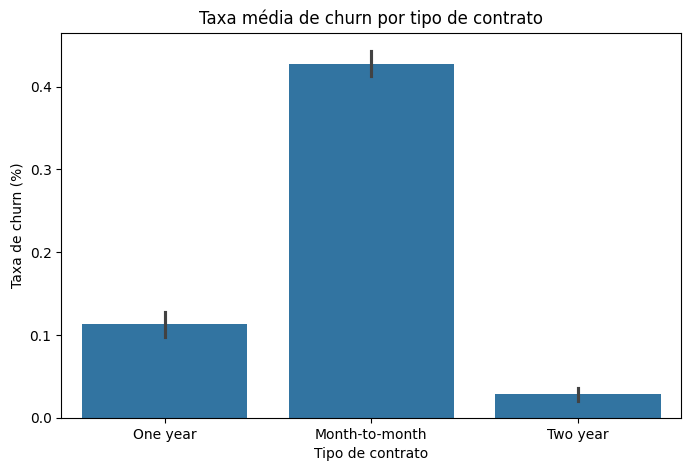

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='account_Contract', y='Churn', data=dados)
plt.title('Taxa média de churn por tipo de contrato')
plt.ylabel('Taxa de churn (%)')
plt.xlabel('Tipo de contrato')
plt.show()


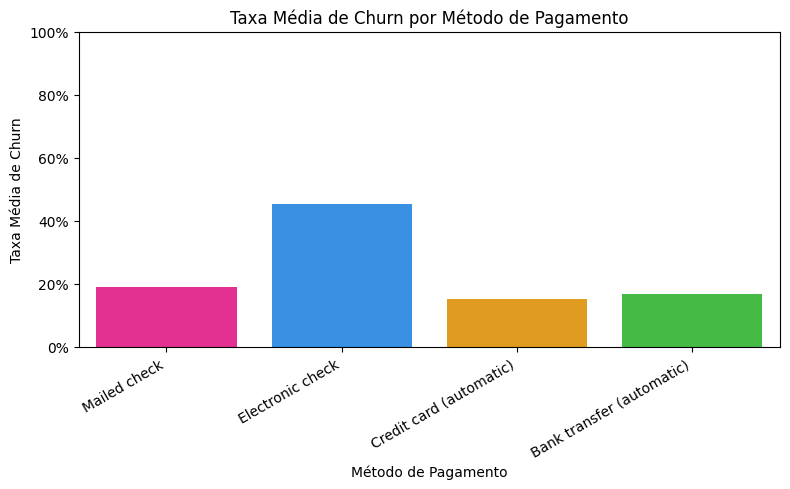

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {
    'Mailed check': '#FF1493',             # rosa forte
    'Electronic check': '#1E90FF',         # azul forte
    'Bank transfer (automatic)': '#32CD32',# verde limão
    'Credit card (automatic)': '#FFA500'   # laranja
}

plt.figure(figsize=(8,5))
sns.barplot(x='account_PaymentMethod', y='Churn', data=dados, ci=None, palette=palette)

plt.title('Taxa Média de Churn por Método de Pagamento')
plt.ylabel('Taxa Média de Churn')
plt.xlabel('Método de Pagamento')

plt.xticks(rotation=30, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [ ]:
dados['account_Charges.Total'] = pd.to_numeric(dados['account_Charges.Total'], errors='coerce')


In [ ]:
estatisticas = dados.groupby('Churn')[['account_Charges.Total', 'customer_tenure']].describe()
print(estatisticas)


      account_Charges.Total                                            \
                      count         mean          std    min      25%   
Churn                                                                   
0.0                  5163.0  2555.344141  2329.456984  18.80  577.825   
1.0                  1869.0  1531.796094  1890.822994  18.85  134.500   

                                  customer_tenure                             \
           50%       75%      max           count       mean        std  min   
Churn                                                                          
0.0    1683.60  4264.125  8672.45          5174.0  37.569965  24.113777  0.0   
1.0     703.55  2331.300  8684.80          1869.0  17.979133  19.531123  1.0   

                               
        25%   50%   75%   max  
Churn                          
0.0    15.0  38.0  61.0  72.0  
1.0     2.0  10.0  29.0  72.0  


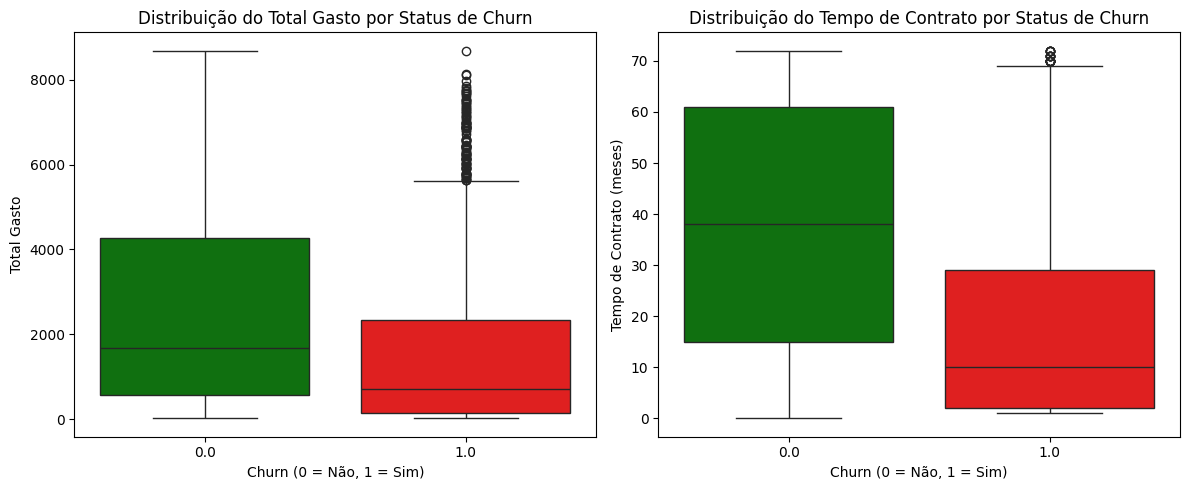

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Boxplot para account_Charges.Total
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='account_Charges.Total', data=dados, palette=['green', 'red'])
plt.title('Distribuição do Total Gasto por Status de Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto')

# Boxplot para customer_tenure
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='customer_tenure', data=dados, palette=['green', 'red'])
plt.title('Distribuição do Tempo de Contrato por Status de Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contrato (meses)')

plt.tight_layout()
plt.show()
